<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/BitCoin-Predictor/BitCoinApallaktiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

#Εισαγωγή του αρχείου
uploaded = files.upload()


Saving BTC_USD Bitfinex Historical Data LargeDataset.csv to BTC_USD Bitfinex Historical Data LargeDataset.csv


In [2]:
import pandas as pd

#Διάβασμα του αρχείου και εμφάνηση των 5 πρώτων στηλών
df = pd.read_csv('BTC_USD Bitfinex Historical Data LargeDataset.csv')
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2022,"47,755.0","46,218.0","47,954.0","46,215.0",2.18K,3.33%
1,01/02/2022,"47,314.0","47,755.0","47,980.0","46,698.0",1.84K,-0.92%
2,01/03/2022,"46,445.0","47,314.0","47,578.0","45,701.0",2.58K,-1.84%
3,01/04/2022,"45,830.0","46,445.0","47,546.0","45,583.0",3.79K,-1.32%
4,01/05/2022,"43,418.0","45,830.0","47,056.7","42,519.0",6.93K,-5.26%


In [3]:
#Μετατροπή των δεδομένων σε αριθμητική μορφή και μετατροπή της μεταβλητής date σε ημερομηνία

# Αντικατάσταση κόμματος με τελεία και μετατροπή σε float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Vol.'] = df['Vol.'].str.replace('K', 'e3').str.replace(',', '').astype(float)

# Αφαίρεση του % και μετατροπή της στήλης Change % σε float
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

#Μετατροπή της στήλης Date σε τύπο ημερομηνίας
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)


# Έλεγχος ότι έγιναν οι επιθυμητές αλλαγές
print(df.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2022-01-01 to 2025-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1097 non-null   float64
 1   Open      1097 non-null   float64
 2   High      1097 non-null   float64
 3   Low       1097 non-null   float64
 4   Vol.      1097 non-null   float64
 5   Change %  1097 non-null   float64
dtypes: float64(6)
memory usage: 60.0 KB
None


In [4]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=ddb71a6c498eb9ba4e3d849b6a6109206810886d818e77302fd69e898ba75ab0
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [5]:
#Υπολογισμός των τεχνικών δεικτών ΜΑ_10 RSI ROC OBV
import pandas_ta as ta

# 10-ημερών κινητός μέσος όρος
df['MA_10'] = df['Price'].rolling(window=10).mean()

# Υπολογισμός RSI (14 ημερών)
df['RSI'] = ta.rsi(df['Price'], length=14)

# Υπολογισμός ROC (10 ημερών)
df['ROC'] = ta.roc(df['Price'], length=10)

# Υπολογισμός OBV
df['OBV'] = ta.obv(df['Price'], df['Vol.'])

# Εμφάνιση του αποτελέσματος
print('Όλα τα δεδομένα \n',df)


Όλα τα δεδομένα 
               Price     Open     High      Low    Vol.  Change %    MA_10  \
Date                                                                        
2022-01-01  47755.0  46218.0  47954.0  46215.0  2180.0      3.33      NaN   
2022-01-02  47314.0  47755.0  47980.0  46698.0  1840.0     -0.92      NaN   
2022-01-03  46445.0  47314.0  47578.0  45701.0  2580.0     -1.84      NaN   
2022-01-04  45830.0  46445.0  47546.0  45583.0  3790.0     -1.32      NaN   
2022-01-05  43418.0  45830.0  47056.7  42519.0  6930.0     -5.26      NaN   
...             ...      ...      ...      ...     ...       ...      ...   
2024-12-28  95533.0  94419.0  95854.0  94311.0   290.0      1.18  96678.5   
2024-12-29  93944.0  95533.0  95556.0  93199.0   590.0     -1.66  96321.4   
2024-12-30  92982.0  93944.0  95130.0  91696.0  1820.0     -1.02  95833.9   
2024-12-31  93780.0  92982.0  96400.0  92175.0  1120.0      0.86  95483.0   
2025-01-01  94757.0  93780.0  95282.0  93131.0   550.0    

In [6]:
# Έλεγχος για ελλιπείς τιμές και αριθμός δειγμάτων
missing_values = df.isnull().sum()
print("Ελλιπείς τιμές ανά στήλη:\n", missing_values)

#Εμφανιση του μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

#Αφαίρεση των τιμών NaN από το dataset και εμφάνιση ξανα των χαμένων τιμών για επιβεβαίωση
df = df.dropna()
print("Ελλιπείς τιμές ανά στήλη:\n", df.isnull().sum())

#Εμφάνιση του τελικού μεγέθους του dataset
print("Αριθμός γραμμών (δειγμάτων):", df.shape[0])
print("Αριθμός στηλών (χαρακτηριστικών):", df.shape[1])

Ελλιπείς τιμές ανά στήλη:
 Price        0
Open         0
High         0
Low          0
Vol.         0
Change %     0
MA_10        9
RSI         14
ROC         10
OBV          0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 1097
Αριθμός στηλών (χαρακτηριστικών): 10
Ελλιπείς τιμές ανά στήλη:
 Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
MA_10       0
RSI         0
ROC         0
OBV         0
dtype: int64
Αριθμός γραμμών (δειγμάτων): 1083
Αριθμός στηλών (χαρακτηριστικών): 10


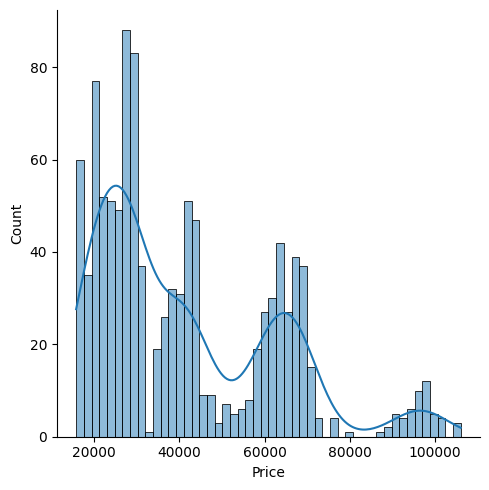

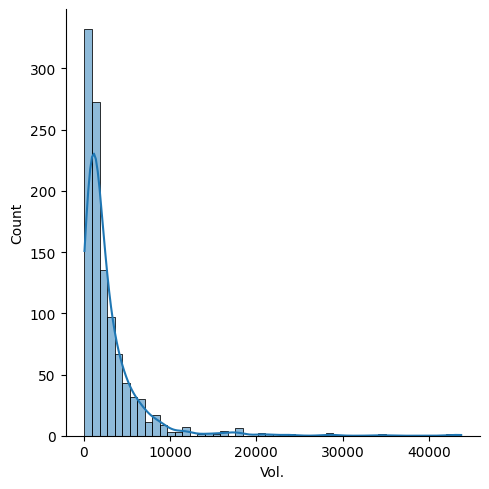

In [8]:
#έλεγχος κατανομής της τιμής και του όγκου αγορών
import seaborn as sns

sns.displot( df['Price'], kde = True, bins = 50 )

sns.displot( df['Vol.'], kde = True, bins = 50 )



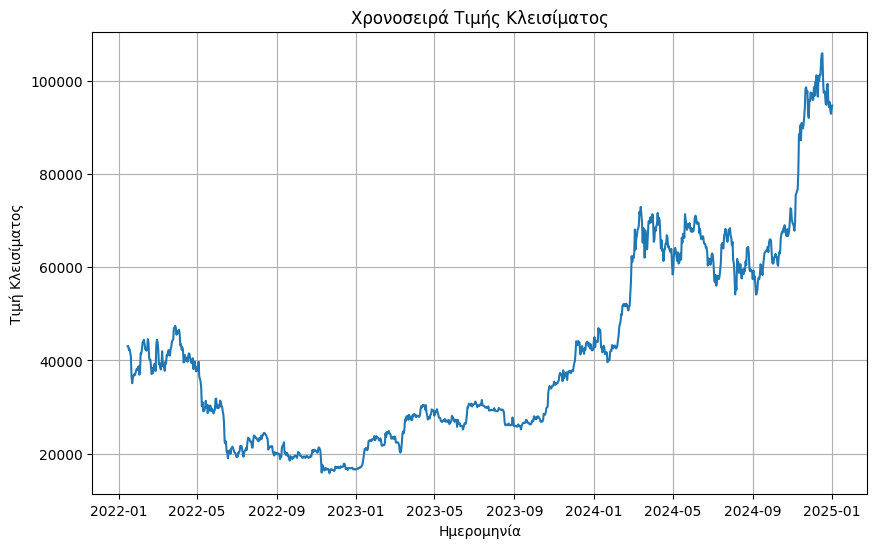

In [11]:
#Οπτικοποίηση της τιμής σε βάθος χρόνου
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'])
plt.title('Χρονοσειρά Τιμής Κλεισίματος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή Κλεισίματος')
plt.grid(True)
plt.show()


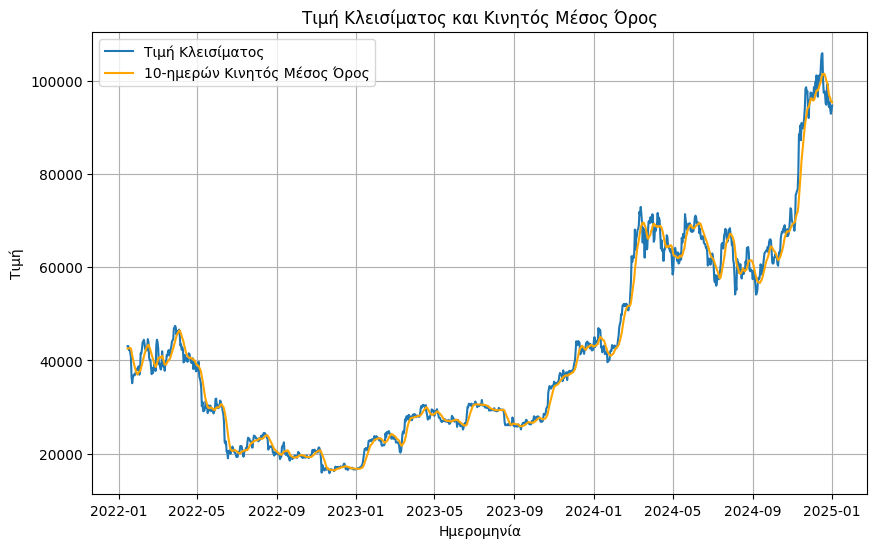

In [12]:
#Οπτικοποίηση της τιμής και του κινητού μέσου όρου σε βάθος χρόνου

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Τιμή Κλεισίματος')
plt.plot(df.index, df['MA_10'], label='10-ημερών Κινητός Μέσος Όρος', color='orange')
plt.title('Τιμή Κλεισίματος και Κινητός Μέσος Όρος')
plt.xlabel('Ημερομηνία')
plt.ylabel('Τιμή')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
#Έλεγχος για κανονικοποίηση των features και εκτέλεση
from sklearn.preprocessing import MinMaxScaler


# Εμφάνιση βασικών στατιστικών για κάθε αριθμητική στήλη
print("\nΒασικά στατιστικά στοιχεία για κάθε στήλη:")
print(df.describe())

# Δημιουργία scaler
scaler = MinMaxScaler()

# Κανονικοποίηση όλων των αριθμητικών στηλών
scaled_data = scaler.fit_transform(df)

# Δημιουργία νέου dataframe με τα κανονικοποιημένα δεδομένα
df = pd.DataFrame(scaled_data, columns=df.columns)

print("Κανονικοποιημένα δεδομένα με Min-Max Scaling:")
print(df.head())



Βασικά στατιστικά στοιχεία για κάθε στήλη:
               Price           Open           High            Low  \
count    1083.000000    1083.000000    1083.000000    1083.000000   
mean    41064.934441   41017.439797   41839.329548   40204.622253   
std     20942.356511   20878.456602   21322.449557   20460.862355   
min     15766.000000   15766.000000   16279.000000   15501.000000   
25%     24442.500000   24442.500000   25201.500000   24112.000000   
50%     34669.000000   34669.000000   35175.000000   34079.000000   
75%     59345.000000   59304.000000   60724.000000   58042.500000   
max    105990.000000  106000.000000  108080.000000  105160.000000   

               Vol.     Change %          MA_10          RSI          ROC  \
count   1083.000000  1083.000000    1083.000000  1083.000000  1083.000000   
mean    2768.476454     0.113176   40849.028994    52.402403     1.173628   
std     3770.018384     2.842161   20590.849293    13.825426     9.241606   
min       90.000000   -15.

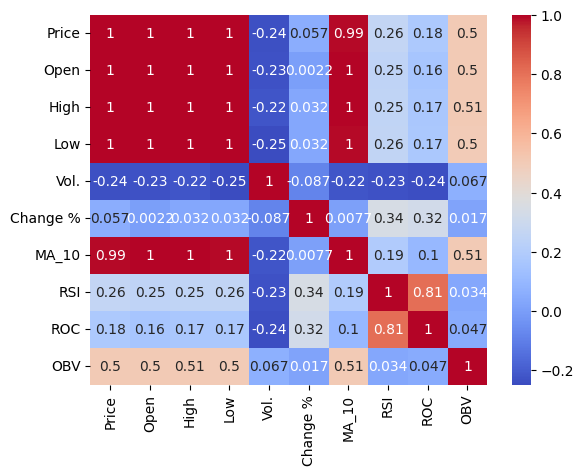


Original Dataset:
      Price      Open      High       Low      Vol.  Change %     MA_10  \
0  0.302613  0.302824  0.299855  0.302245  0.071232  0.518064  0.307272   
1  0.302780  0.302580  0.296380  0.302377  0.034127  0.520716  0.307240   
2  0.293447  0.302746  0.293156  0.290735  0.064819  0.455088  0.308090   
3  0.295088  0.293204  0.287611  0.287790  0.097343  0.531323  0.308924   
4  0.287174  0.295055  0.286513  0.286407  0.145671  0.464037  0.308720   

        RSI       ROC       OBV  
0  0.294209  0.489465  0.797928  
1  0.296322  0.499427  0.805045  
2  0.234808  0.523706  0.791892  
3  0.256762  0.523197  0.811441  
4  0.208715  0.494681  0.782387  

Training Features Dataset:
       Vol.  Change %     MA_10       RSI       ROC       OBV
0  0.071232  0.518064  0.307272  0.294209  0.489465  0.797928
1  0.034127  0.520716  0.307240  0.296322  0.499427  0.805045
2  0.064819  0.455088  0.308090  0.234808  0.523706  0.791892
3  0.097343  0.531323  0.308924  0.256762  0.52319

In [15]:
#ελεγχος για διαγραφη καποιων μεταβλητων απο το dataset λόγο μεγάλης συσχέτησης
import matplotlib.pyplot as plt

#οπτικοποίηση συσχετησης
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()
# Αποθήκευση αρχικού dataset και αφαίρεση των  Price, Open, High και Low απο το τελικό dataset
OG_dataset = df.copy()

# Αφαίρεση των χαρακτηριστικών Price, Open, High, Low και Date από το dataset εκπαίδευσης
Final_df = df.drop(columns=["Price", "Open", "High", "Low"])

# Εμφάνιση των δύο datasets
print("\nOriginal Dataset:")
print(OG_dataset.head())

print("\nTraining Features Dataset:")
print(Final_df.head())

In [16]:
#Προετοιμασία για εκπαίδευση:εισαγωγή της στήλης της επόμενης μέρας (Target), διαχωρισμός του dataset σε train και test και δημιουργία των K-folds για cross-validation
from sklearn.model_selection import train_test_split, KFold

# Δημιουργία της στήλης Target με την τιμή της επόμενης ημέρας (με καθυστέρηση -1)
Final_df['Target'] = OG_dataset['Price'].shift(-1)

# Αφαίρεση των γραμμών με NaN που δημιουργούνται λόγω της μετατόπισης
Final_df = Final_df.dropna()

# Χωρισμός των χαρακτηριστικών και της ετικέτας στόχου (Target)
X = Final_df.drop(columns=["Target"])
y = Final_df["Target"]

# Χωρισμός σε training (80%) και test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Δημιουργία των K-folds για cross-validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Παράδειγμα: Εμφάνιση των index των training και validation sets για κάθε fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    print(f"Fold {fold + 1}:")
    print(f"  Train indices: {train_index[:5]}... (total {len(train_index)})")
    print(f"  Validation indices: {val_index[:5]}... (total {len(val_index)})")


Fold 1:
  Train indices: [0 1 2 3 4]... (total 692)
  Validation indices: [ 5 10 23 29 30]... (total 173)
Fold 2:
  Train indices: [0 1 3 4 5]... (total 692)
  Validation indices: [ 2  6  7 18 24]... (total 173)
Fold 3:
  Train indices: [1 2 4 5 6]... (total 692)
  Validation indices: [ 0  3  9 11 12]... (total 173)
Fold 4:
  Train indices: [0 1 2 3 4]... (total 692)
  Validation indices: [ 8 16 17 26 36]... (total 173)
Fold 5:
  Train indices: [0 2 3 5 6]... (total 692)
  Validation indices: [ 1  4 13 14 20]... (total 173)


In [17]:
#Εκπαίδευση μοντέλων Linear Regression, RandomForest, SVM

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from math import sqrt

# Ορισμός των μοντέλων
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(kernel='rbf')
}

# Αρχικοποίηση λίστας για αποθήκευση των αποτελεσμάτων
results = []

# Εκπαίδευση και αξιολόγηση κάθε μοντέλου με K-Fold cross-validation
for model_name, model in models.items():
    fold_mae, fold_mse, fold_rmse, fold_r2 = [], [], [], []

    for train_index, val_index in kf.split(X_train):
        # Διαχωρισμός των δεδομένων σε train και validation sets για το τρέχον fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Εκπαίδευση του μοντέλου
        model.fit(X_train_fold, y_train_fold)

        # Πρόβλεψη στο validation set
        y_pred = model.predict(X_val_fold)

        # Υπολογισμός μετρικών
        mae = mean_absolute_error(y_val_fold, y_pred)
        mse = mean_squared_error(y_val_fold, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y_val_fold, y_pred)

        # Αποθήκευση μετρικών για το fold
        fold_mae.append(mae)
        fold_mse.append(mse)
        fold_rmse.append(rmse)
        fold_r2.append(r2)

    # Αποθήκευση του μέσου όρου των μετρικών για το τρέχον μοντέλο
    results.append({
        "Model": model_name,
        "MAE": np.mean(fold_mae),
        "MSE": np.mean(fold_mse),
        "RMSE": np.mean(fold_rmse),
        "R² Score": np.mean(fold_r2)
    })

# Εμφάνιση των αποτελεσμάτων
results_df = pd.DataFrame(results)
print(results_df)


               Model       MAE       MSE      RMSE  R² Score
0  Linear Regression  0.013822  0.000394  0.019712  0.992946
1      Random Forest  0.011744  0.000315  0.017650  0.994337
2                SVM  0.038476  0.002411  0.048927  0.956623


In [18]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import numpy as np

# Ορισμός των μοντέλων
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(kernel='rbf')
}

# Λειτουργία για τον υπολογισμό των μετρικών
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

# Εκπαίδευση και αξιολόγηση κάθε μοντέλου με K-Fold cross-validation
for model_name, model in models.items():
    print(f"\n--- Εκπαίδευση του μοντέλου: {model_name} ---")

    fold_results = []  # Αποθήκευση των αποτελεσμάτων για κάθε fold

    for fold, (train_index, val_index) in enumerate(kf.split(X_train), start=1):
        print(f"\nFold {fold}:")

        # Διαχωρισμός δεδομένων σε train και validation sets για το fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Εκπαίδευση του μοντέλου
        start_time = time.time()
        model.fit(X_train_fold, y_train_fold)
        training_time = time.time() - start_time
        print(f"  Finished training in {training_time:.4f} seconds.")

        # Προβλέψεις
        predicted_train = model.predict(X_train_fold)
        predicted_val = model.predict(X_val_fold)
        predicted_test = model.predict(X_test)  # Πρόβλεψη στο test set

        # Υπολογισμός μετρικών
        train_metrics = calculate_metrics(y_train_fold, predicted_train)
        val_metrics = calculate_metrics(y_val_fold, predicted_val)
        test_metrics = calculate_metrics(y_test, predicted_test)

        # Αποθήκευση αποτελεσμάτων για το fold
        fold_results.append({
            "Fold": fold,
            "Training Time (s)": training_time,
            "Train MAE": train_metrics["MAE"],
            "Train MSE": train_metrics["MSE"],
            "Train RMSE": train_metrics["RMSE"],
            "Train R²": train_metrics["R² Score"],
            "Val MAE": val_metrics["MAE"],
            "Val MSE": val_metrics["MSE"],
            "Val RMSE": val_metrics["RMSE"],
            "Val R²": val_metrics["R² Score"],
            "Test MAE": test_metrics["MAE"],
            "Test MSE": test_metrics["MSE"],
            "Test RMSE": test_metrics["RMSE"],
            "Test R²": test_metrics["R² Score"]
        })

    # Εμφάνιση αποτελεσμάτων για κάθε fold
    for result in fold_results:
        print(f"\nFold {result['Fold']} Results:")
        for metric, value in result.items():
            if metric != "Fold":
                print(f"  {metric}: {value:.4f}")



--- Εκπαίδευση του μοντέλου: Linear Regression ---

Fold 1:
  Finished training in 0.0039 seconds.

Fold 2:
  Finished training in 0.0045 seconds.

Fold 3:
  Finished training in 0.0031 seconds.

Fold 4:
  Finished training in 0.0029 seconds.

Fold 5:
  Finished training in 0.0030 seconds.

Fold 1 Results:
  Training Time (s): 0.0039
  Train MAE: 0.0138
  Train MSE: 0.0004
  Train RMSE: 0.0196
  Train R²: 0.9930
  Val MAE: 0.0135
  Val MSE: 0.0004
  Val RMSE: 0.0199
  Val R²: 0.9930
  Test MAE: 0.0132
  Test MSE: 0.0003
  Test RMSE: 0.0185
  Test R²: 0.9927

Fold 2 Results:
  Training Time (s): 0.0045
  Train MAE: 0.0131
  Train MSE: 0.0004
  Train RMSE: 0.0189
  Train R²: 0.9935
  Val MAE: 0.0155
  Val MSE: 0.0005
  Val RMSE: 0.0226
  Val R²: 0.9909
  Test MAE: 0.0129
  Test MSE: 0.0003
  Test RMSE: 0.0181
  Test R²: 0.9930

Fold 3 Results:
  Training Time (s): 0.0031
  Train MAE: 0.0132
  Train MSE: 0.0004
  Train RMSE: 0.0192
  Train R²: 0.9932
  Val MAE: 0.0152
  Val MSE: 0.0005
 

In [32]:
import time
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Ορισμός των μοντέλων
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(kernel='rbf')
}

# Λειτουργία για τον υπολογισμό των μετρικών
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

# Λίστα για αποθήκευση των αποτελεσμάτων που θα μετατραπεί σε DataFrame
results_list = []

# Dictionery για αποθήκευση των προβλέψεων (train, val, test) ανά μοντέλο
predictions_dict = {model_name: {"train": [], "val": [], "test": []} for model_name in models.keys()}

# Εκπαίδευση και αξιολόγηση κάθε μοντέλου με K-Fold cross-validation
for model_name, model in models.items():
    print(f"\n--- Εκπαίδευση του μοντέλου: {model_name} ---")

    for fold, (train_index, val_index) in enumerate(kf.split(X_train), start=1):
        print(f"\nFold {fold}:")

        # Διαχωρισμός δεδομένων σε train και validation sets για το fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Εκπαίδευση του μοντέλου
        start_time = time.time()
        model.fit(X_train_fold, y_train_fold)
        training_time = time.time() - start_time
        print(f"  Finished training in {training_time:.4f} seconds.")

        # Προβλέψεις
        predicted_train = model.predict(X_train_fold)
        predicted_val = model.predict(X_val_fold)
        predicted_test = model.predict(X_test)  # Πρόβλεψη στο test set

        # Αποθήκευση των προβλέψεων του τελευταίου fold στο λεξικό
        if fold == kf.get_n_splits():  # Ελέγχουμε αν είναι το τελευταίο fold
            predictions_dict[model_name]["train"] = predicted_train
            predictions_dict[model_name]["val"] = predicted_val
            predictions_dict[model_name]["test"] = predicted_test

        # Υπολογισμός μετρικών
        train_metrics = calculate_metrics(y_train_fold, predicted_train)
        val_metrics = calculate_metrics(y_val_fold, predicted_val)
        test_metrics = calculate_metrics(y_test, predicted_test)

        # Αποθήκευση αποτελεσμάτων στη λίστα
        for dataset, metrics in zip(["train", "val", "test"], [train_metrics, val_metrics, test_metrics]):
            results_list.append({
                "Classifier Name": model_name,
                "Training or val or test set": dataset,
                "Number of training samples": len(X_train_fold) if dataset == "train" else len(X_val_fold),
                "Fold": fold,
                "Training Time (s)": training_time if dataset == "train" else None,
                "R² Score": metrics["R² Score"],
                "MAE": metrics["MAE"],
                "MSE": metrics["MSE"],
                "RMSE": metrics["RMSE"]
            })
         # Εμφάνιση αποτελεσμάτων για κάθε fold
    for result in fold_results:
      print(f"\nFold {result['Fold']} Results:")
      for metric, value in result.items():
        if metric != "Fold":
          print(f"  {metric}: {value:.4f}")



# Μετατροπή της λίστας σε DataFrame
results_df = pd.DataFrame(results_list)

# Αποθήκευση του DataFrame σε αρχείο CSV
results_df.to_csv('model_results.csv', index=False)
print("Τα αποτελέσματα αποθηκεύτηκαν στο αρχείο 'model_results.csv'.")





--- Εκπαίδευση του μοντέλου: Linear Regression ---

Fold 1:
  Finished training in 0.0029 seconds.

Fold 2:
  Finished training in 0.0021 seconds.

Fold 3:
  Finished training in 0.0036 seconds.

Fold 4:
  Finished training in 0.0020 seconds.

Fold 5:
  Finished training in 0.0030 seconds.

Fold 1 Results:
  Training Time (s): 0.0040
  Train MAE: 0.0425
  Train MSE: 0.0026
  Train RMSE: 0.0514
  Train R²: 0.9521
  Val MAE: 0.0452
  Val MSE: 0.0031
  Val RMSE: 0.0552
  Val R²: 0.9463
  Test MAE: 0.0447
  Test MSE: 0.0029
  Test RMSE: 0.0543
  Test R²: 0.9374

Fold 2 Results:
  Training Time (s): 0.0055
  Train MAE: 0.0379
  Train MSE: 0.0022
  Train RMSE: 0.0472
  Train R²: 0.9597
  Val MAE: 0.0372
  Val MSE: 0.0023
  Val RMSE: 0.0475
  Val R²: 0.9598
  Test MAE: 0.0382
  Test MSE: 0.0023
  Test RMSE: 0.0484
  Test R²: 0.9502

Fold 3 Results:
  Training Time (s): 0.0031
  Train MAE: 0.0380
  Train MSE: 0.0022
  Train RMSE: 0.0472
  Train R²: 0.9588
  Val MAE: 0.0405
  Val MSE: 0.0027
 

<Figure size 2500x600 with 0 Axes>

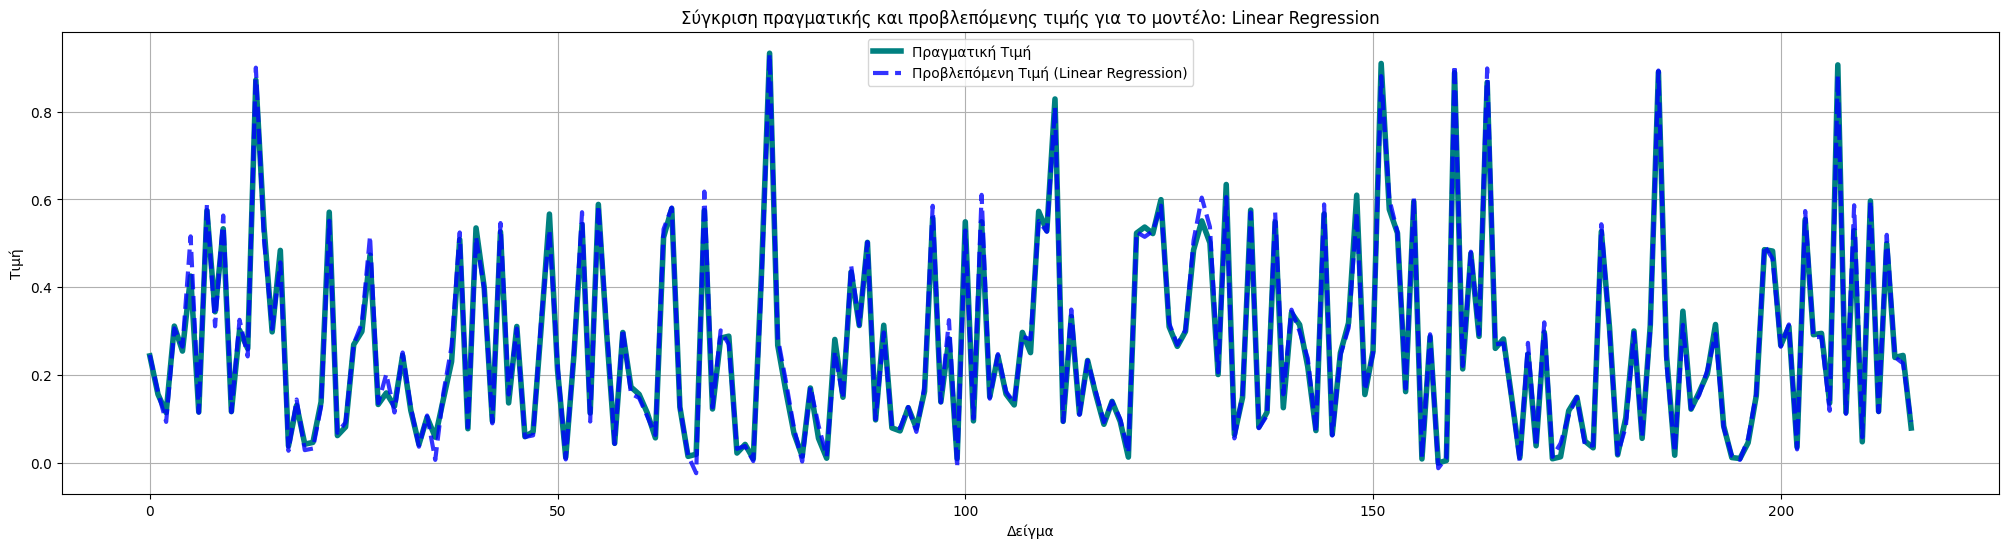

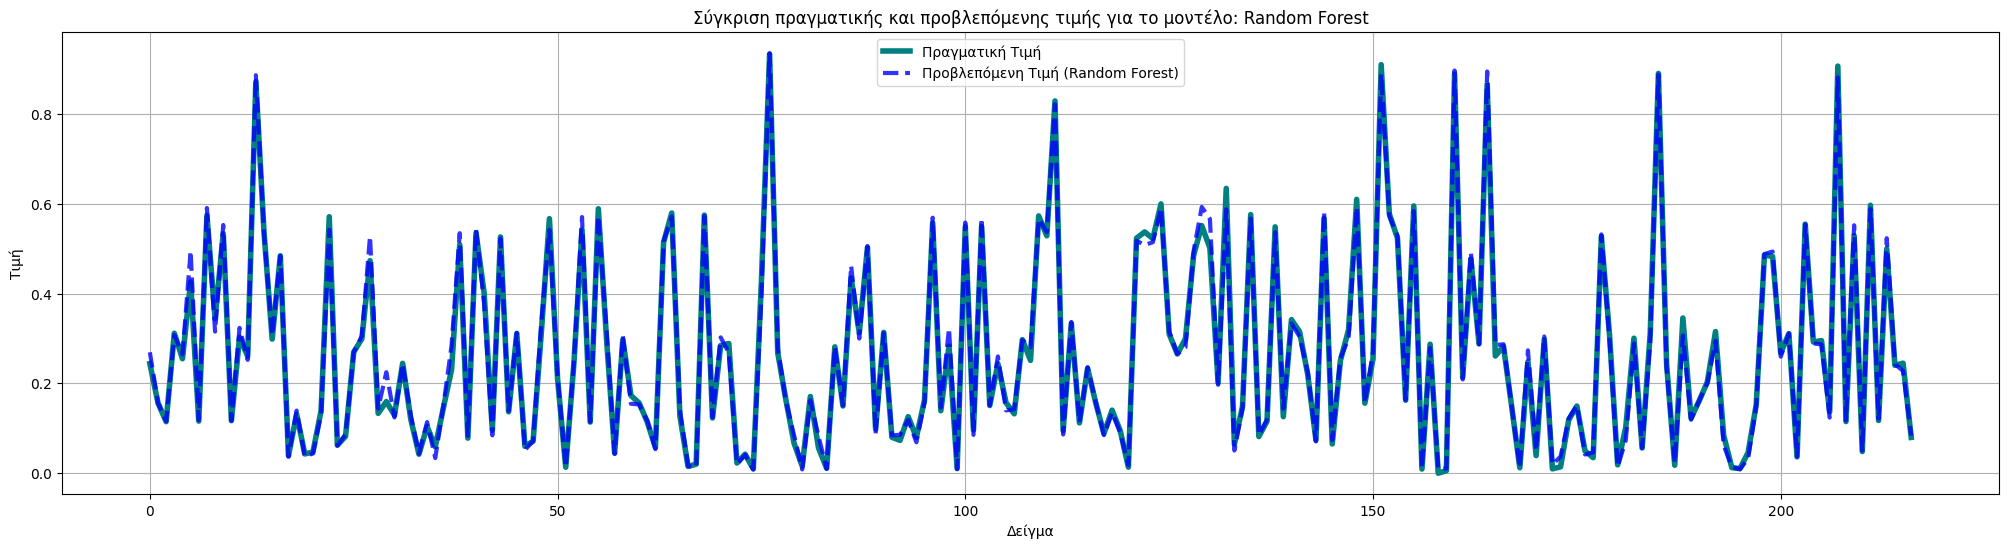

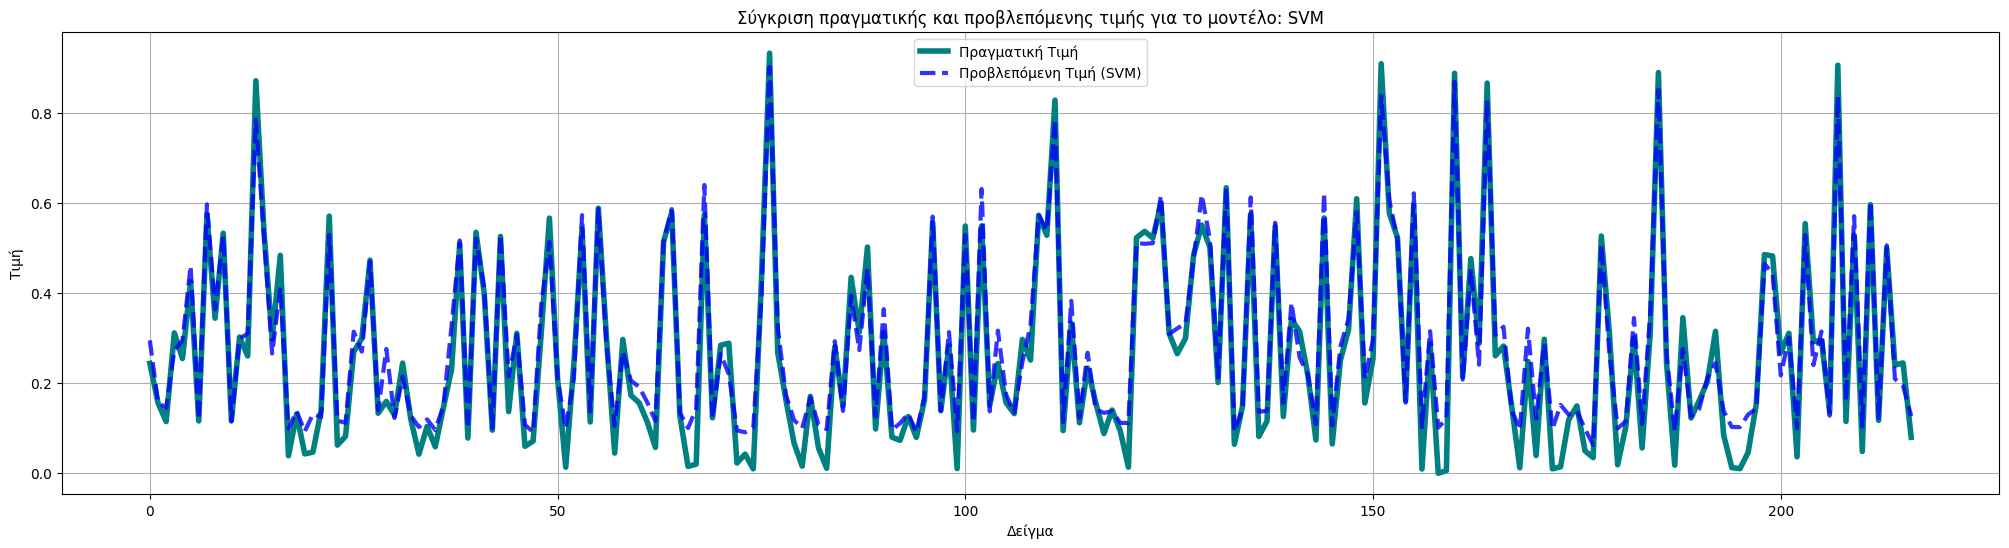

In [52]:
# Σύγκριση πραγματικής τιμής με πρόβλεψη για το test set
plt.figure(figsize=(25, 6))
for model_name in models.keys():
    plt.figure(figsize=(25, 6))
    plt.plot(y_test.values, label="Πραγματική Τιμή", color='teal',lw = 4)
    plt.plot(predictions_dict[model_name]["test"], label=f"Προβλεπόμενη Τιμή ({model_name})", linestyle='--',color='blue',lw = 3, alpha = 0.8)
    plt.title(f"Σύγκριση πραγματικής και προβλεπόμενης τιμής για το μοντέλο: {model_name}")
    plt.xlabel("Δείγμα")
    plt.ylabel("Τιμή")
    plt.legend()
    plt.grid(True)
    plt.show()



Linear Regression

 Test MAE 0.04471870513467859

 Test MSE 0.002943983563936351

 Test RMSE 0.054258488404454755

 Test R² 0.9374215709176967

 Test MAE 0.03819162913174517

 Test MSE 0.0023407667661817424

 Test RMSE 0.04838147131063443

 Test R² 0.9502437755189576

 Test MAE 0.038048142240864724

 Test MSE 0.0023022560809290243

 Test RMSE 0.04798183073757216

 Test R² 0.9510623732229392

 Test MAE 0.036701049311229327

 Test MSE 0.0021833144765380113

 Test RMSE 0.04672595078260058

 Test R² 0.9535906409913116

 Test MAE 0.036613174828655226

 Test MSE 0.00216951149354241

 Test RMSE 0.04657801513098653

 Test R² 0.9538840424229961
Random Forest

 Test MAE 0.04471870513467859

 Test MSE 0.002943983563936351

 Test RMSE 0.054258488404454755

 Test R² 0.9374215709176967

 Test MAE 0.03819162913174517

 Test MSE 0.0023407667661817424

 Test RMSE 0.04838147131063443

 Test R² 0.9502437755189576

 Test MAE 0.038048142240864724

 Test MSE 0.0023022560809290243

 Test RMSE 0.0479818307375

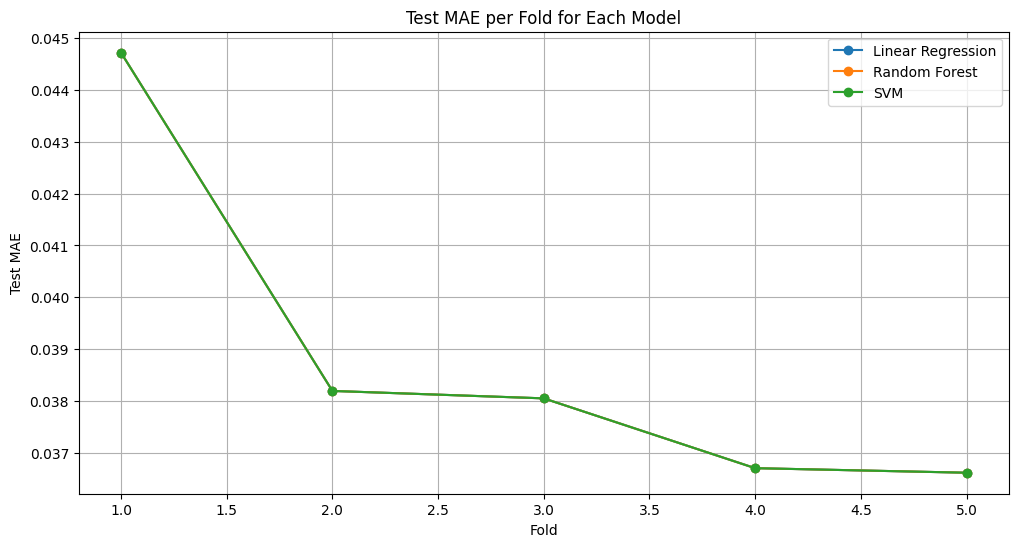

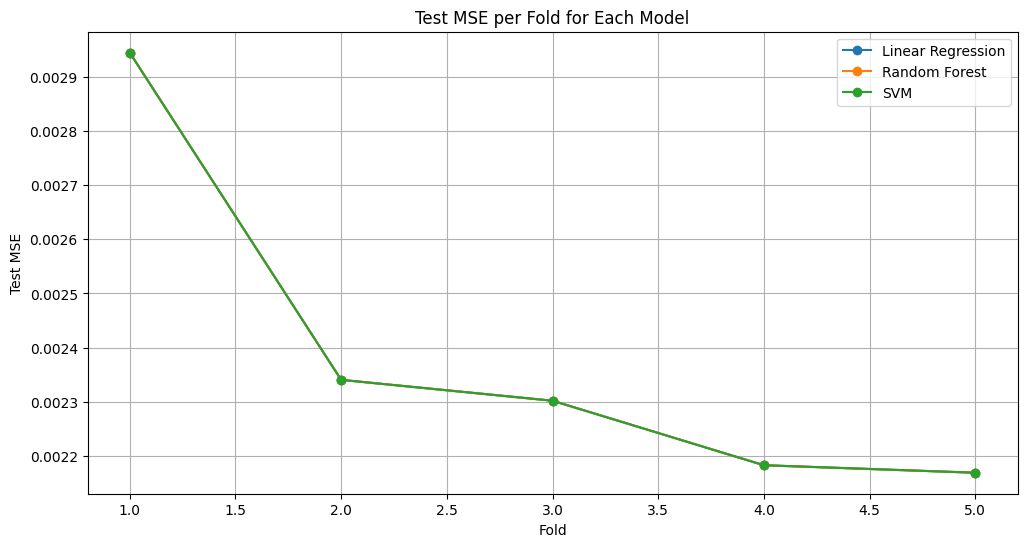

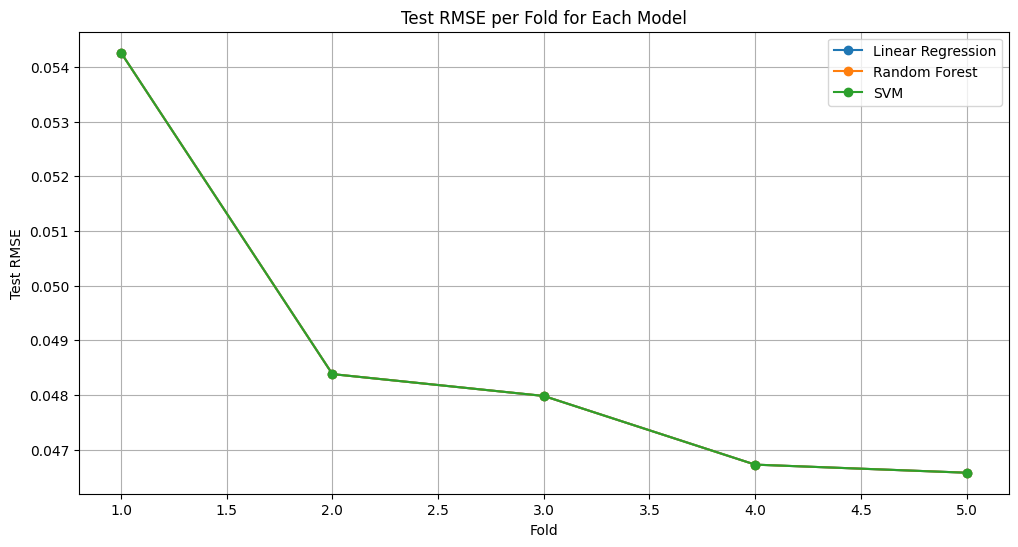

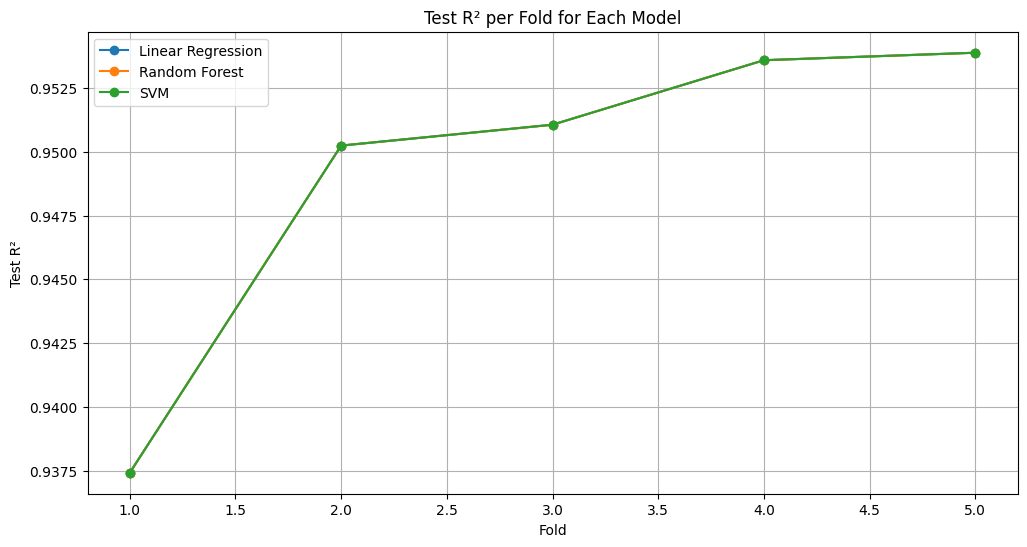

In [33]:
import matplotlib.pyplot as plt

# Λίστα με τα ονόματα των μοντέλων
models = ["Linear Regression", "Random Forest", "SVM"]

# --- Δημιουργία δομής δεδομένων για αποθήκευση των test μετρικών ---
test_metrics_per_model = {model: {"Test MAE": [], "Test MSE": [], "Test RMSE": [], "Test R²": []} for model in models}

# Συλλογή των test αποτελεσμάτων από το fold_results για κάθε μοντέλο
for model_name in models:
    print(model_name)
    for fold_result in fold_results:  # fold_results: λίστα με τα αποτελέσματα ανά fold για το τρέχον μοντέλο
        test_metrics_per_model[model_name]["Test MAE"].append(fold_result["Test MAE"])
        print('\n Test MAE', fold_result["Test MAE"])
        test_metrics_per_model[model_name]["Test MSE"].append(fold_result["Test MSE"])
        print('\n Test MSE', fold_result["Test MSE"])
        test_metrics_per_model[model_name]["Test RMSE"].append(fold_result["Test RMSE"])
        print('\n Test RMSE', fold_result["Test RMSE"])
        test_metrics_per_model[model_name]["Test R²"].append(fold_result["Test R²"])
        print('\n Test R²', fold_result["Test R²"])


# --- Οπτικοποίηση για κάθε μετρική ---
metrics = ["Test MAE", "Test MSE", "Test RMSE", "Test R²"]

for metric in metrics:
    plt.figure(figsize=(12, 6))

    for model in models:
        plt.plot(range(1, 6), test_metrics_per_model[model][metric], label=model, marker='o')

    plt.title(f"{metric} per Fold for Each Model")
    plt.xlabel("Fold")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


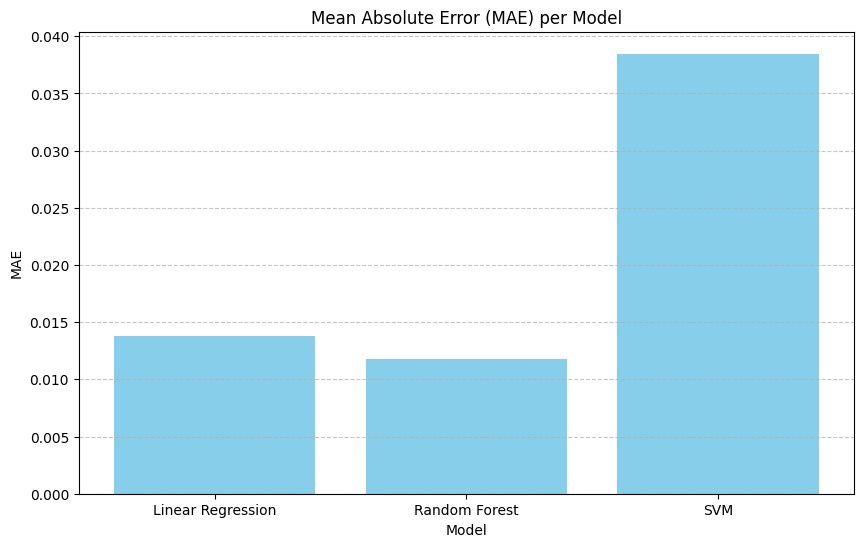

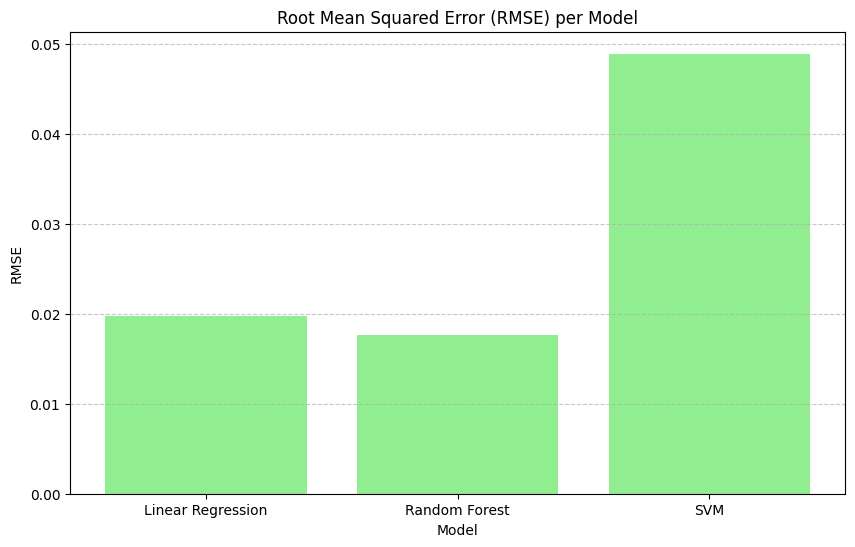

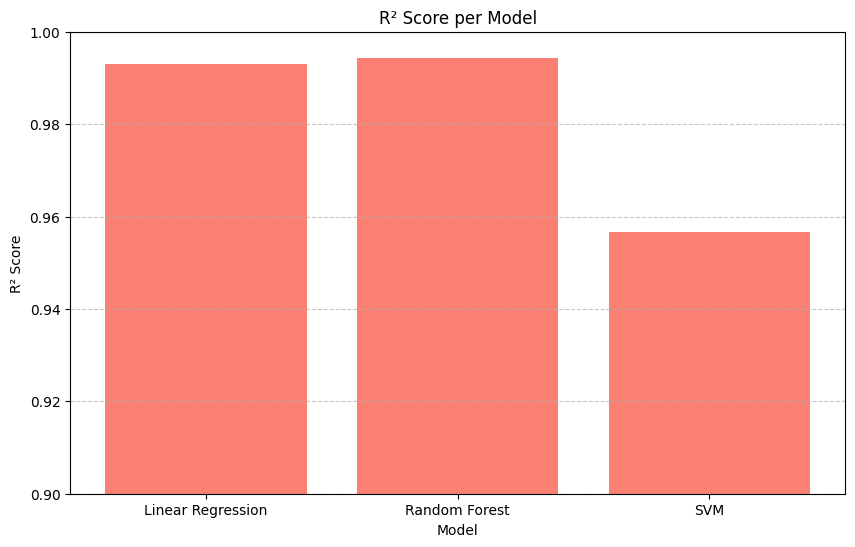

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Δημιουργία DataFrame από τα αποτελέσματα
results_df = pd.DataFrame(results)
results_df.head()
# --- Οπτικοποίηση MAE ανά μοντέλο ---
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["MAE"], color='skyblue')
plt.title("Mean Absolute Error (MAE) per Model")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Οπτικοποίηση RMSE ανά μοντέλο ---
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["RMSE"], color='lightgreen')
plt.title("Root Mean Squared Error (RMSE) per Model")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Οπτικοποίηση R² Score ανά μοντέλο ---
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["R² Score"], color='salmon')
plt.title("R² Score per Model")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0.9, 1.0)  # Ρύθμιση άξονα Y για καλύτερη ανάγνωση
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
